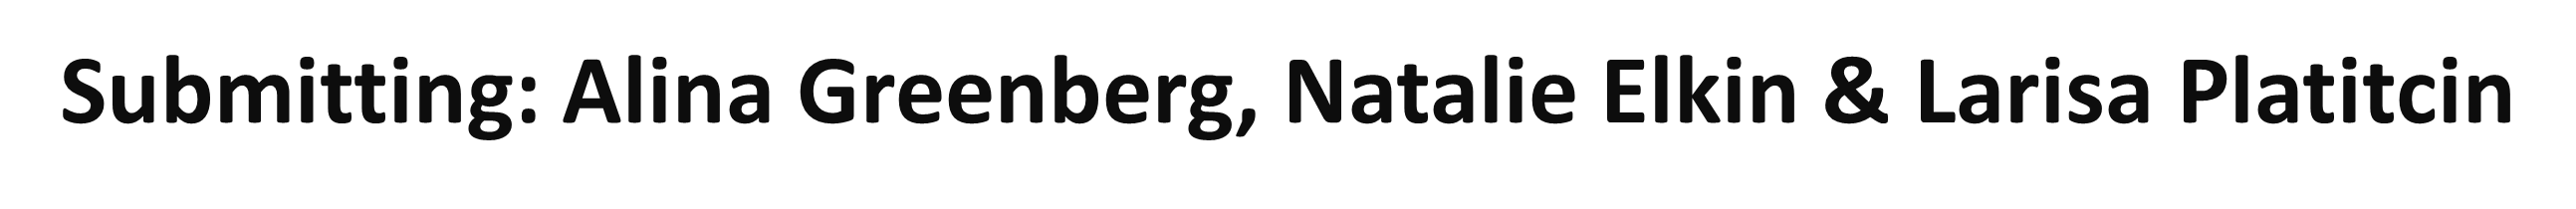

<br>
<br>
<hr class="dashed">
<br>
<br>

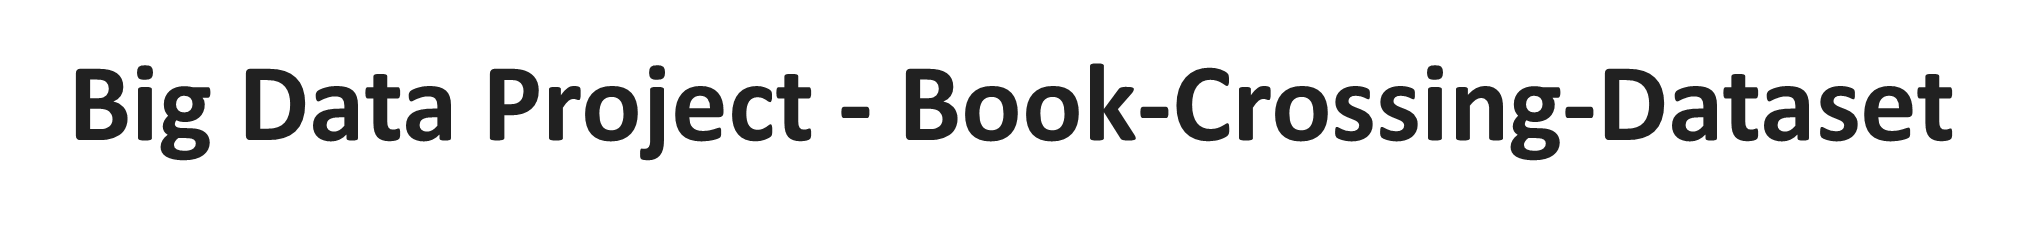

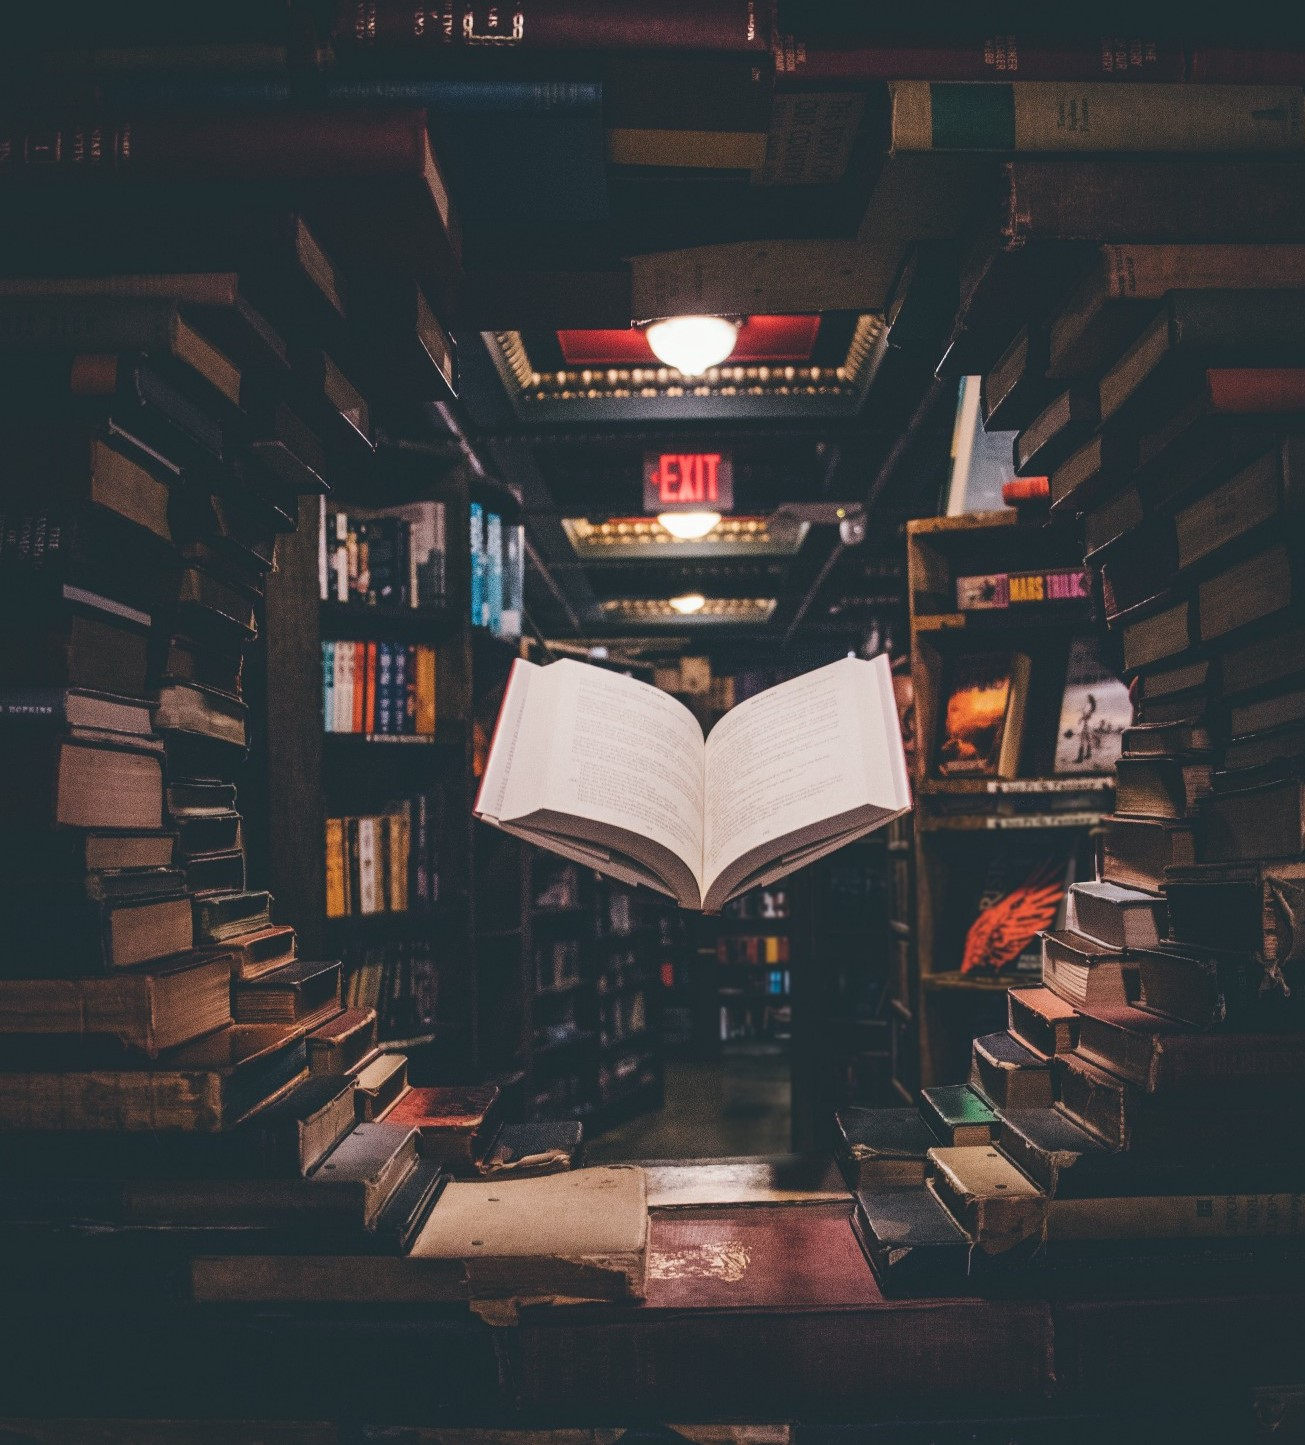

#**Background:**<br>
The BookCrossing(BX) dataset was colected by Cai-Nicolas Ziegles in a 4-week crawl(August/September 2004) from the BookCrossing community with kind permission from Ron Horbaker, CTO of Humankind Systems.

# **Link to dataset files:**
[http://www2.informatik.uni-freiburg.de/~cziegler/BX/](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)


**Instructions:**<br>
1. Go to the link.
2. Download CSV files.
3. Create a new folder in the private Google Drive.
4. Upload the new files to this folder.

<br>
<br>
<hr class="dashed">
<br>
<br>

###**First, install the enviorment:**

In [ ]:
# 1) Install Java, Spark and and run a local Spark session by just running this on Google Colab:
!apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null 
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz   
!pip install -q findspark 

# 2) Set the locations where Spark and Java are installed to let know Colab where to find it.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

# 3) Import spark libraries and use them
import findspark
findspark.init("spark-3.3.0-bin-hadoop3") 
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql import Row
from pyspark.sql import functions

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (93.9 kB/s)
Reading package li

<br>
<br>
<hr class="dashed">
<br>
<br>

###**Establishing connection between "Colab" to "Google Drive"**

In [ ]:
# Code for connecting our google drive to this collab notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Check what files we have in the path of the new folder:
!ls "/content/drive/MyDrive/Spark/project"  

BX-Book-Ratings.csv  BX-Books.csv  BX-Users.csv  new_CSV_files


<br>
<br>
<hr class="dashed">
<br>
<br>

# **Creating a new folder with path:**

In [ ]:
# Create new folder with a name "new_CSV_files":
folderPath = '/content/drive/MyDrive/Spark/project/new_CSV_files'

**Before we convert the DataFrames into files, let's make sure our folder is empty.**

In [ ]:
# Deleting any files in the "folderPath":
import os
import glob

filesInFolder = '/content/drive/MyDrive/Spark/project/new_CSV_files/*.*' # --> Deleting all file from "new_CSV_files" folder in Google Drive.
fileList = glob.glob(filesInFolder)
print("Number of files BEFORE delete: ",len(fileList))

for x in fileList:
    try:
        os.remove(x)
    except:
        print("Error while deleting file : ", x)
fileList = glob.glob(filesInFolder)
print("Number of files AFTER delete: ",len(fileList))

Number of files BEFORE delete:  1
Number of files AFTER delete:  0


In [ ]:
# Check what files we have in the path of the new folder:
!ls "/content/drive/MyDrive/Spark/project"  

BX-Book-Ratings.csv  BX-Books.csv  BX-Users.csv  new_CSV_files


<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - Users:**

In [ ]:
# First we will read the file "BX-Users.csv" into a spark DataFrame:
users  = spark.read.option("delimiter",";").option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/Spark/project/BX-Users.csv', inferSchema=True)

In [ ]:
users.show()

+-------+--------------------+----+
|User-ID|            Location| Age|
+-------+--------------------+----+
|      1|  nyc, new york, usa|NULL|
|      2|stockton, califor...|  18|
|      3|moscow, yukon ter...|NULL|
|      4|porto, v.n.gaia, ...|  17|
|      5|farnborough, hant...|NULL|
|      6|santa monica, cal...|  61|
|      7| washington, dc, usa|NULL|
|      8|timmins, ontario,...|NULL|
|      9|germantown, tenne...|NULL|
|     10|albacete, wiscons...|  26|
|     11|melbourne, victor...|  14|
|     12|fort bragg, calif...|NULL|
|     13|barcelona, barcel...|  26|
|     14|mediapolis, iowa,...|NULL|
|     15|calgary, alberta,...|NULL|
|     16|albuquerque, new ...|NULL|
|     17|chesapeake, virgi...|NULL|
|     18|rio de janeiro, r...|  25|
|     19|           weston, ,|  14|
|     20|langhorne, pennsy...|  19|
+-------+--------------------+----+
only showing top 20 rows



In [ ]:
users.count()

278859

In [ ]:
users.printSchema()

root
 |-- User-ID: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Age: string (nullable = true)



In [ ]:
#Print out the first 3 Rows:
for row in users.head(3):
    print(row)

Row(User-ID='1', Location='nyc, new york, usa', Age='NULL')
Row(User-ID='2', Location='stockton, california, usa', Age='18')
Row(User-ID='3', Location='moscow, yukon territory, russia', Age='NULL')


It can been seen that in users's DataFrame, there are 3 columns:

<table>
    <tr><th> User-ID </th><td> ID of users </td></tr>
    <tr><th> Location </th><td> What location is the user in </td></tr>
    <tr><th> Age </th><td> The age of an user </td></tr>
</table>

# **Schema for the dataframes can also be defined explicitly while reading data:**

In [ ]:
from pyspark.sql.types import (StructField, IntegerType,StringType, StructType)

data_schema_users = [StructField('User-ID', IntegerType(),True), StructField('Location', StringType(), True), StructField('Age', IntegerType(), True)]          
final_struct_users = StructType(fields = data_schema_users)

In [ ]:
# We need to create a DataFrame where columns are separated:
users = spark.read.option("delimiter",";").option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/Spark/project/BX-Users.csv', schema = final_struct_users, inferSchema=True)

#**Data Cleaning**

In [ ]:
# What is in 'users' DataFrame?
users.show()

+-------+--------------------+----+
|User-ID|            Location| Age|
+-------+--------------------+----+
|      1|  nyc, new york, usa|null|
|      2|stockton, califor...|  18|
|      3|moscow, yukon ter...|null|
|      4|porto, v.n.gaia, ...|  17|
|      5|farnborough, hant...|null|
|      6|santa monica, cal...|  61|
|      7| washington, dc, usa|null|
|      8|timmins, ontario,...|null|
|      9|germantown, tenne...|null|
|     10|albacete, wiscons...|  26|
|     11|melbourne, victor...|  14|
|     12|fort bragg, calif...|null|
|     13|barcelona, barcel...|  26|
|     14|mediapolis, iowa,...|null|
|     15|calgary, alberta,...|null|
|     16|albuquerque, new ...|null|
|     17|chesapeake, virgi...|null|
|     18|rio de janeiro, r...|  25|
|     19|           weston, ,|  14|
|     20|langhorne, pennsy...|  19|
+-------+--------------------+----+
only showing top 20 rows



In [ ]:
# The shape of DataFrame:
print((users.count(), len(users.columns)))

(278859, 3)


In [ ]:
users.printSchema()

root
 |-- User-ID: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Age: integer (nullable = true)



In [ ]:
# Rename DataFrame column name:
users = users.withColumnRenamed('User-ID', 'UserID')

In [ ]:
# String Split of the column in pyspark:
from pyspark.sql.functions import split

users = users.withColumn('City', split(users['Location'], ',').getItem(0))\
             .withColumn('State', split(users['Location'], ',').getItem(1))\
             .withColumn('Location', split(users['Location'], ',').getItem(2))
             
users.show()

+------+---------------+----+--------------+----------------+
|UserID|       Location| Age|          City|           State|
+------+---------------+----+--------------+----------------+
|     1|            usa|null|           nyc|        new york|
|     2|            usa|  18|      stockton|      california|
|     3|         russia|null|        moscow| yukon territory|
|     4|       portugal|  17|         porto|        v.n.gaia|
|     5| united kingdom|null|   farnborough|           hants|
|     6|            usa|  61|  santa monica|      california|
|     7|            usa|null|    washington|              dc|
|     8|         canada|null|       timmins|         ontario|
|     9|            usa|null|    germantown|       tennessee|
|    10|          spain|  26|      albacete|       wisconsin|
|    11|      australia|  14|     melbourne|        victoria|
|    12|            usa|null|    fort bragg|      california|
|    13|          spain|  26|     barcelona|       barcelona|
|    14|

In [ ]:
# Rename DataFrame column name:
users = users.withColumnRenamed('Location', 'Country')

In [ ]:
users.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)



In [ ]:
# Remove leading and trailing space of the column in pyspark:
from pyspark.sql.functions import *

users = users.withColumn('City', trim(users.City))
users = users.withColumn('State', trim(users.State))
users = users.withColumn('Country', trim(users.Country))
users.show(truncate =False)

+------+--------------+----+--------------+---------------+
|UserID|Country       |Age |City          |State          |
+------+--------------+----+--------------+---------------+
|1     |usa           |null|nyc           |new york       |
|2     |usa           |18  |stockton      |california     |
|3     |russia        |null|moscow        |yukon territory|
|4     |portugal      |17  |porto         |v.n.gaia       |
|5     |united kingdom|null|farnborough   |hants          |
|6     |usa           |61  |santa monica  |california     |
|7     |usa           |null|washington    |dc             |
|8     |canada        |null|timmins       |ontario        |
|9     |usa           |null|germantown    |tennessee      |
|10    |spain         |26  |albacete      |wisconsin      |
|11    |australia     |14  |melbourne     |victoria       |
|12    |usa           |null|fort bragg    |california     |
|13    |spain         |26  |barcelona     |barcelona      |
|14    |usa           |null|mediapolis  

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+-------+------+----+-----+
|UserID|Country|   Age|City|State|
+------+-------+------+----+-----+
|     1|   4727|110763| 589|17136|
+------+-------+------+----+-----+



###**UserID column:** 

In [ ]:
# looking for null values in UserId column:
users.filter("UserID is NULL").show()

+------+-------+----+----+-----+
|UserID|Country| Age|City|State|
+------+-------+----+----+-----+
|  null|   null|null|NULL| null|
+------+-------+----+----+-----+



In [ ]:
#droping rows where UserID is NULL:
users = users.dropna(subset=['UserID'])

In [ ]:
# Let see if we succeed to remove all nan or missing values from UserID column:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+-------+------+----+-----+
|UserID|Country|   Age|City|State|
+------+-------+------+----+-----+
|     0|   4726|110762| 588|17135|
+------+-------+------+----+-----+



### **Age column:**

In [ ]:
# Sort by Age column:
users.sort(users.Age.asc()).show(truncate=False)

+------+-----------+----+-------------+-------------------+
|UserID|Country    |Age |City         |State              |
+------+-----------+----+-------------+-------------------+
|188059|usa        |null|fargo        |north dakota       |
|188030|canada     |null|toronto      |ontario            |
|188023|usa        |null|marina       |california         |
|188022|usa        |null|harlowton    |montana            |
|188053|usa        |null|alexandria   |tennessee          |
|188006|usa        |null|san francisco|california         |
|187993|australia  |null|melbourne    |victoria           |
|188034|usa        |null|cleveland    |ohio               |
|188002|canada     |null|niagara falls|ontario            |
|188036|usa        |null|tampa        |florida            |
|187986|usa        |null|eastover     |south carolina     |
|188038|canada     |null|innisfail    |alberta            |
|188009|usa        |null|ellwood city |pennsylvania       |
|188040|usa        |null|n/a          |n

In [ ]:
# Groupby agg column to count how many we have in every group:
users.groupBy("Age").count().sort(users.Age.asc()).show(244)

+----+------+
| Age| count|
+----+------+
|null|110762|
|   0|   416|
|   1|   288|
|   2|   105|
|   3|    45|
|   4|    28|
|   5|    26|
|   6|    18|
|   7|    27|
|   8|    54|
|   9|    62|
|  10|    84|
|  11|   121|
|  12|   192|
|  13|   885|
|  14|  1962|
|  15|  2383|
|  16|  2570|
|  17|  3044|
|  18|  3703|
|  19|  3950|
|  20|  4056|
|  21|  4438|
|  22|  4714|
|  23|  5456|
|  24|  5687|
|  25|  5618|
|  26|  5547|
|  27|  5383|
|  28|  5347|
|  29|  5293|
|  30|  4778|
|  31|  4665|
|  32|  4781|
|  33|  4699|
|  34|  4656|
|  35|  4194|
|  36|  3896|
|  37|  3582|
|  38|  3404|
|  39|  3234|
|  40|  3142|
|  41|  2919|
|  42|  2758|
|  43|  2816|
|  44|  2745|
|  45|  2518|
|  46|  2526|
|  47|  2512|
|  48|  2303|
|  49|  2461|
|  50|  2340|
|  51|  2203|
|  52|  2077|
|  53|  2072|
|  54|  2140|
|  55|  1885|
|  56|  1692|
|  57|  1878|
|  58|  1319|
|  59|  1205|
|  60|  1125|
|  61|  1035|
|  62|   882|
|  63|   792|
|  64|   680|
|  65|   593|
|  66|   545|
|  67|

In [ ]:
# Clean the age values - if the age is larger than 118 (Lucile Randon - the oldest person in the world alive https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people) or equals zero - than -1
from pyspark.sql.functions import when
users = users.withColumn('Age', when((users['Age'] > 118) | (users['Age'] == 0) , -1).otherwise(users['Age']))

In [ ]:
# Replace null values in "Age" column with the values -1:
from pyspark.sql.functions import col,isnan,when,count

users = users.withColumn("Age", when((users.Age == 'None') | \
                            (users.Age == 'none') | \
                            (users.Age == 'null') | \
                            (users.Age.contains('n/a')) | \
                            (users.Age == 'null') | \
                            (users.Age == '') | \
                            (users.Age.isNull()) | \
                            isnan(users.Age),-1).otherwise(users.Age).alias('Age'))

In [ ]:
# Let see if we succeed to remove all nan values from Age column:
users.groupBy("Age").count().sort(users.Age.asc()).show(truncate=False)

+---+------+
|Age|count |
+---+------+
|-1 |111257|
|1  |288   |
|2  |105   |
|3  |45    |
|4  |28    |
|5  |26    |
|6  |18    |
|7  |27    |
|8  |54    |
|9  |62    |
|10 |84    |
|11 |121   |
|12 |192   |
|13 |885   |
|14 |1962  |
|15 |2383  |
|16 |2570  |
|17 |3044  |
|18 |3703  |
|19 |3950  |
+---+------+
only showing top 20 rows



In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+-------+---+----+-----+
|UserID|Country|Age|City|State|
+------+-------+---+----+-----+
|     0|   4726|  0| 588|17135|
+------+-------+---+----+-----+



###**Country column, City column and State column:**

In [ ]:
# Replace null values in "City" column with the values 'unknown':
users = users.withColumn("City", when((users.City == 'None') | \
                            (users.City == 'none') | \
                            (users.City == 'null') | \
                            (users.City == 'NULL') | \
                            (users.City == '') | \
                            (users.City.contains('n/a')) | \
                            (users.City.isNull()) | \
                            isnan(users.City),'unknown').otherwise(users.City).alias('City'))
                            
# Replace null values in "State" column with the values 'unknown':
users = users.withColumn("State", when((users.State == 'None') | \
                            (users.State == 'none') | \
                            (users.State == 'null') | \
                            (users.State == 'NULL') | \
                            (users.State == '') | \
                            (users.State.contains('n/a')) | \
                            (users.State.isNull()) | \
                            isnan(users.State),'unknown').otherwise(users.State).alias('State'))

# Replace null values in "Country" column with the values 'unknown':
users = users.withColumn("Country", when((users.Country == 'None') | \
                            (users.Country == 'none') | \
                            (users.Country == 'null') | \
                            (users.Country == 'NULL') | \
                            (users.Country == '') | \
                            (users.Country.contains('n/a')) | \
                            (users.Country.isNull()) | \
                            isnan(users.Country),'unknown').otherwise(users.Country).alias('Country'))                             

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+-------+---+----+-----+
|UserID|Country|Age|City|State|
+------+-------+---+----+-----+
|     0|      0|  0|   0|    0|
+------+-------+---+----+-----+



In [ ]:
# This code snippet replace special characters with empty string:
# We want to create new location columns in order to clear special characters.
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace

users = users.select('UserID', 'Age', 'City',regexp_replace("City", r"[^a-zA-ZÀ-ÿ $]", " ").alias('CityChanged'), 
                     'State',regexp_replace("State",r"[^a-zA-ZÀ-ÿ $]", " " ).alias('StateChanged'),
                     'Country',regexp_replace('Country',r"[^a-zA-ZÀ-ÿ $]", " " ).alias('CountryChanged'))

In [ ]:
# Let's select a row with special characters to show the change we made:
users.filter("UserID == '45362'").show()

+------+---+--------------------+--------------------+--------------------+--------------------+-------+--------------+
|UserID|Age|                City|         CityChanged|               State|        StateChanged|Country|CountryChanged|
+------+---+--------------------+--------------------+--------------------+--------------------+-------+--------------+
| 45362| 18|meishan/&#30473;&...|meishan          ...|sichuan/&#22235;&...|sichuan          ...|  china|         china|
+------+---+--------------------+--------------------+--------------------+--------------------+-------+--------------+



In [ ]:
users.filter("UserID == '96750'").show()
users.show(50)

+------+---+---------+-----------+---------+------------+-------+--------------+
|UserID|Age|     City|CityChanged|    State|StateChanged|Country|CountryChanged|
+------+---+---------+-----------+---------+------------+-------+--------------+
| 96750| 21|å??å±±å¸?|  å  å  å  |æ²³å??ç??|   æ  å  ç  | ä¸­å?½|        ä  å  |
+------+---+---------+-----------+---------+------------+-------+--------------+

+------+---+--------------+--------------+------------------+------------------+----------------+----------------+
|UserID|Age|          City|   CityChanged|             State|      StateChanged|         Country|  CountryChanged|
+------+---+--------------+--------------+------------------+------------------+----------------+----------------+
|     1| -1|           nyc|           nyc|          new york|          new york|             usa|             usa|
|     2| 18|      stockton|      stockton|        california|        california|             usa|             usa|
|     3| -1|       

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+---+----+-----------+-----+------------+-------+--------------+
|UserID|Age|City|CityChanged|State|StateChanged|Country|CountryChanged|
+------+---+----+-----------+-----+------------+-------+--------------+
|     0|  0|   0|          0|    0|           0|      0|             0|
+------+---+----+-----------+-----+------------+-------+--------------+



In [ ]:
# Remove leading and trailing space of the column in pyspark:
from pyspark.sql.functions import *

users = users.withColumn('CityChanged', trim(users.CityChanged))
users = users.withColumn('StateChanged', trim(users.StateChanged))
users = users.withColumn('CountryChanged', trim(users.CountryChanged))
users.show()

+------+---+--------------+--------------+---------------+---------------+--------------+--------------+
|UserID|Age|          City|   CityChanged|          State|   StateChanged|       Country|CountryChanged|
+------+---+--------------+--------------+---------------+---------------+--------------+--------------+
|     1| -1|           nyc|           nyc|       new york|       new york|           usa|           usa|
|     2| 18|      stockton|      stockton|     california|     california|           usa|           usa|
|     3| -1|        moscow|        moscow|yukon territory|yukon territory|        russia|        russia|
|     4| 17|         porto|         porto|       v.n.gaia|       v n gaia|      portugal|      portugal|
|     5| -1|   farnborough|   farnborough|          hants|          hants|united kingdom|united kingdom|
|     6| 61|  santa monica|  santa monica|     california|     california|           usa|           usa|
|     7| -1|    washington|    washington|             

In [ ]:
# The selected row with special characters after a change: 
users.filter("UserID == '45362'").show()

+------+---+--------------------+-----------+--------------------+------------+-------+--------------+
|UserID|Age|                City|CityChanged|               State|StateChanged|Country|CountryChanged|
+------+---+--------------------+-----------+--------------------+------------+-------+--------------+
| 45362| 18|meishan/&#30473;&...|    meishan|sichuan/&#22235;&...|     sichuan|  china|         china|
+------+---+--------------------+-----------+--------------------+------------+-------+--------------+



In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+---+----+-----------+-----+------------+-------+--------------+
|UserID|Age|City|CityChanged|State|StateChanged|Country|CountryChanged|
+------+---+----+-----------+-----+------------+-------+--------------+
|     0|  0|   0|        211|    0|         153|      0|            15|
+------+---+----+-----------+-----+------------+-------+--------------+



In [ ]:
# Replace null values in "CityChanged" column with the values 'unknown':
users = users.withColumn("CityChanged", when((users.CityChanged == 'None') | \
                            (users.CityChanged == 'none') | \
                            (users.CityChanged == 'null') | \
                            (users.CityChanged == 'NULL') | \
                            (users.CityChanged == '') | \
                            (users.CityChanged.contains('n/a')) | \
                            (users.CityChanged.isNull()) | \
                            isnan(users.CityChanged),'unknown').otherwise(users.CityChanged).alias('CityChanged'))
                            
# Replace null values in "StateChanged" column with the values 'unknown':
users = users.withColumn("StateChanged", when((users.StateChanged == 'None') | \
                            (users.StateChanged == 'none') | \
                            (users.StateChanged == 'null') | \
                            (users.StateChanged == 'NULL') | \
                            (users.StateChanged == '') | \
                            (users.StateChanged.contains('n/a')) | \
                            (users.StateChanged.isNull()) | \
                            isnan(users.StateChanged),'unknown').otherwise(users.StateChanged).alias('StateChanged'))

# Replace null values in "CountryChanged" column with the values 'unknown':
users = users.withColumn("CountryChanged", when((users.CountryChanged == 'None') | \
                            (users.CountryChanged == 'none') | \
                            (users.CountryChanged == 'null') | \
                            (users.CountryChanged == 'NULL') | \
                            (users.CountryChanged == '') | \
                            (users.CountryChanged.contains('n/a')) | \
                            (users.CountryChanged.isNull()) | \
                            isnan(users.CountryChanged),'unknown').otherwise(users.CountryChanged).alias('CountryChanged'))                             

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

users_nan = users.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in users.columns]).show()

+------+---+----+-----------+-----+------------+-------+--------------+
|UserID|Age|City|CityChanged|State|StateChanged|Country|CountryChanged|
+------+---+----+-----------+-----+------------+-------+--------------+
|     0|  0|   0|          0|    0|           0|      0|             0|
+------+---+----+-----------+-----+------------+-------+--------------+



In [ ]:
users.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- City: string (nullable = true)
 |-- CityChanged: string (nullable = true)
 |-- State: string (nullable = true)
 |-- StateChanged: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- CountryChanged: string (nullable = true)



#**Observation of country columns:**

In [ ]:
users.filter(users.CountryChanged.contains('u a e')).show()

+------+---+---------+-----------+---------+------------+-------+--------------+
|UserID|Age|     City|CityChanged|    State|StateChanged|Country|CountryChanged|
+------+---+---------+-----------+---------+------------+-------+--------------+
|   201| -1|  sharjah|    sharjah|  sharjah|     sharjah|  u.a.e|         u a e|
| 12750| -1|    dubai|      dubai|       ae|          ae|  u.a.e|         u a e|
| 22669| 34|    dubai|      dubai|  unknown|     unknown|  u.a.e|         u a e|
| 65250| -1|abu dhabi|  abu dhabi|abu dhabi|   abu dhabi|  u.a.e|         u a e|
| 92238| -1|    dubai|      dubai|    dubai|       dubai|  u.a.e|         u a e|
|143589| -1|    dubai|      dubai|  unknown|     unknown|  u.a.e|         u a e|
|149525| 27|    dubai|      dubai|    dubai|       dubai|  u.a.e|         u a e|
|167100| -1|    dubai|      dubai|    dubai|       dubai|  u.a.e|         u a e|
|176132| -1|    dubai|      dubai|  unknown|     unknown|  u.a.e|         u a e|
|179788| -1|  sharjah|    sh

In [ ]:
users.groupBy("CountryChanged").count().sort(users.CountryChanged.asc()).collect()

[Row(CountryChanged='a', count=1),
 Row(CountryChanged='a new year is ahead', count=1),
 Row(CountryChanged='aaa', count=1),
 Row(CountryChanged='aberdeenshire', count=1),
 Row(CountryChanged='acoruña', count=1),
 Row(CountryChanged='address is adem ademoski', count=1),
 Row(CountryChanged='adsgfdr', count=1),
 Row(CountryChanged='afganstand holla', count=1),
 Row(CountryChanged='afghanistan', count=29),
 Row(CountryChanged='africa', count=1),
 Row(CountryChanged='agusan del sur', count=1),
 Row(CountryChanged='ahrensburg', count=1),
 Row(CountryChanged='alabama', count=6),
 Row(CountryChanged='alachua', count=1),
 Row(CountryChanged='alajuela', count=1),
 Row(CountryChanged='alaska', count=1),
 Row(CountryChanged='alava', count=1),
 Row(CountryChanged='albania', count=31),
 Row(CountryChanged='alberta', count=9),
 Row(CountryChanged='alderney', count=10),
 Row(CountryChanged='alentejo', count=3),
 Row(CountryChanged='algeria', count=28),
 Row(CountryChanged='algérie', count=1),
 Row(C

In [ ]:
users = users.withColumn("CountryChanged", when((users.CountryChanged == 'usa') | \
                            (users.CountryChanged == 'u s a') | \
                            (users.CountryChanged.contains('u s ')) \
                            ,'united states').otherwise(users.CountryChanged).alias('CountryChanged'))    

users = users.withColumn("CountryChanged", when((users.CountryChanged == 'u a e') | \
                            (users.CountryChanged == 'uae') \
                            ,'united arab emirates').otherwise(users.CountryChanged).alias('CountryChanged'))  

users = users.withColumn("CountryChanged", when((users.CountryChanged == 'uk') | \
                          (users.CountryChanged == 'u k'),'united kingdom').otherwise(users.CountryChanged).alias('CountryChanged'))  

In [ ]:
users = users.withColumn("StateChanged", when((users.StateChanged == 'usa') | \
                            (users.StateChanged == 'u s a') | \
                            (users.StateChanged.contains('u s ')) \
                            ,'united states').otherwise(users.StateChanged).alias('StateChanged'))    

users = users.withColumn("StateChanged", when((users.StateChanged == 'u a e') | \
                            (users.StateChanged == 'uae') \
                            ,'united arab emirates').otherwise(users.StateChanged).alias('StateChanged'))  

users = users.withColumn("StateChanged", when((users.StateChanged == 'uk') | \
                          (users.StateChanged == 'u k'),'united kingdom').otherwise(users.StateChanged).alias('StateChanged'))  

In [ ]:
from pyspark.sql.functions import countDistinct
df2 = users.select(countDistinct("Country"))
df2.show()

+-----------------------+
|count(DISTINCT Country)|
+-----------------------+
|                   1000|
+-----------------------+



In [ ]:
from pyspark.sql.functions import countDistinct
df2 = users.select(countDistinct("CountryChanged"))
df2.show()

+------------------------------+
|count(DISTINCT CountryChanged)|
+------------------------------+
|                           965|
+------------------------------+



# **Making Correct Countries Name List:**

In [ ]:
correctcountryname = ['Afghanistan','Albania','Algeria','Andorra','Angola','Antigua and Barbuda','Argentina','Armenia','Australia','Austria','Azerbaijan','Bahamas','Bahrain',
'Bangladesh',
'Barbados','Belarus','Belgium','Belize','Benin','Bhutan','Bolivia','Bosnia and Herzegovina','Botswana','Brazil','Brunei Darussalam','Bulgaria','Burkina Faso','Burundi','Cabo Verde',
'Cambodia','Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia','Comoros','Congo','Congo','Costa Rica','Côte d Ivoire','Croatia','Cuba','Cyprus','Czechia',
'Denmark','Djibouti','Dominica','Dominican Republic','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Eswatini','Ethiopia','Fiji','Finland','France','Gabon',
'Gambia','Georgia','Germany','Ghana','Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana','Haiti','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland',
'Israel','Italy','Jamaica','Japan','Jordan','Kazakhstan','Kenya','Kiribati','Democratic Republic of Korea (North Korea)','Republic Of Korea (South Korea)','Kuwait','Kyrgyzstan',
'Lao Peoples Democratic Republic','Latvia','Lebanon','Lesotho','Liberia','Libya','Liechtenstein','Lithuania','Luxembourg','Madagascar','Malawi','Malaysia','Maldives','Mali',
'Malta','Marshall Islands','Mauritania','Mauritius','Mexico','Micronesia','Moldova','Monaco','Mongolia','Montenegro','Morocco','Mozambique','Myanmar','Namibia','Nauru','Nepal',
'Netherlands','New Zealand','Nicaragua','Niger','Nigeria','North Macedonia','Norway','Oman','Pakistan','Palau','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland',
'Portugal','Qatar','Romania','Russia','Rwanda','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Samoa','San Marino','Sao Tome and Principe','Saudi Arabia'
,'Senegal','Serbia','Seychelles','Sierra Leone','Singapore','Slovakia','Slovenia','Solomon Islands','Somalia','South Africa','South Sudan','Spain','Sri Lanka','Sudan','Suriname',
'Sweden','Switzerland','Syria','Taiwan', 'Tajikistan','Tanzania','Thailand','Timor-Leste','Togo','Tonga','Trinidad and Tobago','Tunisia','Türkiye','Turkmenistan','Tuvalu',
'Uganda','Ukraine','United Arab Emirates','United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Venezuela','Viet Nam','Yemen','Zambia','Zimbabwe']

In [ ]:
lower_case_correctcountryname = [x.lower() for x in correctcountryname]

In [ ]:
# Let's specify the function that select most similar word:
from difflib import SequenceMatcher
def get_most_similar(word):
     wordlist = lower_case_correctcountryname
     top_similarity = 0.75
     most_similar_word = word
     flag = 0
     for candidate in wordlist:
         similarity = SequenceMatcher(None,word,candidate).ratio()
           
         if similarity >= top_similarity:
             top_similarity = similarity
             most_similar_word = candidate
             flag = 1
       
     if flag == 1 :
       return most_similar_word
     return "unknown"

In [ ]:
# For Example:
get_most_similar('syria')

'syria'

In [ ]:
# Using the function "get_most_similar(word)":
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

newcountry = udf(lambda x: get_most_similar(x), StringType())
users = users.withColumn("correctcountryname", newcountry(col("CountryChanged")))

In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

newcountry = udf(lambda x: get_most_similar(x), StringType())
users = users.withColumn("correctcountrynamefromstate", newcountry(col("StateChanged")))

In [ ]:
users = users.select("UserID", "Age","correctcountryname", "correctcountrynamefromstate",when(users.correctcountryname == "unknown",users.correctcountrynamefromstate).otherwise(users.correctcountryname).alias("new_country"))

In [ ]:
# Deleting some columns:
users = users.drop('correctcountryname', 'correctcountrynamefromstate')

In [ ]:
# Rename DataFrame column name:
users = users.withColumnRenamed('new_country', 'Country')
users.show()

+------+---+--------------+
|UserID|Age|       Country|
+------+---+--------------+
|     1| -1| united states|
|     2| 18| united states|
|     3| -1|        russia|
|     4| 17|      portugal|
|     5| -1|united kingdom|
|     6| 61| united states|
|     7| -1| united states|
|     8| -1|        canada|
|     9| -1| united states|
|    10| 26|         spain|
|    11| 14|     australia|
|    12| -1| united states|
|    13| 26|         spain|
|    14| -1| united states|
|    15| -1|        canada|
|    16| -1| united states|
|    17| -1| united states|
|    18| 25|        brazil|
|    19| 14|       unknown|
|    20| 19| united states|
+------+---+--------------+
only showing top 20 rows



<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - Books:**

In [ ]:
books = spark.read.csv('/content/drive/MyDrive/Spark/project/BX-Books.csv', header=True)

In [ ]:
# What is in 'books' DataFrame?
books.show()

+-------------------------------------------------------------------------------------------------------------+
|"ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"|
+-------------------------------------------------------------------------------------------------------------+
|                                                                                         "0195153448";"Cla...|
|                                                                                         "0002005018";"Cla...|
|                                                                                         "0060973129";"Dec...|
|                                                                                         "0374157065";"Flu...|
|                                                                                         "0393045218";"The...|
|                                                                                         "0399135782";"

In [ ]:
# The shape of DataFrame:
print((books.count(), len(books.columns)))

(271379, 1)


In [ ]:
#Print out the first 3 Rows:
for row in books.head(3):
    print(row)

Row("ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"='"0195153448";"Classical Mythology";"Mark P. O. Morford";"2002";"Oxford University Press";"http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg"')
Row("ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"='"0002005018";"Clara Callan";"Richard Bruce Wright";"2001";"HarperFlamingo Canada";"http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg";"http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg";"http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg"')
Row("ISBN";"Book-Title";"Book-Author";"Year-Of-Publication";"Publisher";"Image-URL-S";"Image-URL-M";"Image-URL-L"='"0060973129";"Decision in Normandy";"Carlo D\'Este";"1991";"HarperPerennial";"http://images.amazon.com

It can beseen that in books's DataFrame, there are 8 columns:

<table>
    <tr><th> ISBN </th><td> The International Standard Book Number </td></tr>
    <tr><th> Book-Title </th><td> It is a name for the book which is usually chosen by the author </td></tr>
    <tr><th> Book-Author </th><td> The The writer of a literary work (such as a book) </td></tr>
    <tr><th> Year-Of-Publication </th><td> The date on which a book is published, or is going to be published </td></tr>
    <tr><th> Publisher </th><td> A person or company whose business is the publishing of books </td></tr>
    <tr><th> Image-URL-S </th><td> A web address that specifies the location of an image (in size small) </td></tr>
    <tr><th> Image-URL-M </th><td> A web address that specifies the location of an image (in size medium) </td></tr>
    <tr><th> Image-URL-L </th><td> A web address that specifies the location of an image (in size large) </td></tr>
</table>

#### **Schema for the dataframes can also be defined explicitly while reading data:**

In [ ]:
from pyspark.sql.types import (StructField, IntegerType,StringType, StructType)

data_schema_books = [StructField('ISBN', StringType(),True), StructField('Book-Title', StringType(), True),StructField('Book-Author', StringType(), True),
                     StructField('Year-Of-Publication', IntegerType(), True),
                     StructField('Publisher', StringType(),True), StructField('Image-URL-S', StringType(),True), StructField('Image-URL-M', StringType(),True),
                     StructField('Image-URL-L', StringType(),True)]          
final_struct_books = StructType(fields = data_schema_books)

In [ ]:
# We need to create a DataFrame where columns are separated:
books = spark.read.option("delimiter",";").option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/Spark/project/BX-Books.csv', schema = final_struct_books, inferSchema=True)
books.show()

+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|      ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|         Image-URL-S|         Image-URL-M|         Image-URL-L|
+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|0195153448| Classical Mythology|  Mark P. O. Morford|               2002|Oxford University...|http://images.ama...|http://images.ama...|http://images.ama...|
|0002005018|        Clara Callan|Richard Bruce Wright|               2001|HarperFlamingo Ca...|http://images.ama...|http://images.ama...|http://images.ama...|
|0060973129|Decision in Normandy|        Carlo D'Este|               1991|     HarperPerennial|http://images.ama...|http://images.ama...|http://images.ama...|
|0374157065|Flu: The Story of...|    Gina Bari

In [ ]:
# The shape of DataFrame:
print((books.count(), len(books.columns)))

(271379, 8)


In [ ]:
books.printSchema()

root
 |-- ISBN: string (nullable = true)
 |-- Book-Title: string (nullable = true)
 |-- Book-Author: string (nullable = true)
 |-- Year-Of-Publication: integer (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Image-URL-S: string (nullable = true)
 |-- Image-URL-M: string (nullable = true)
 |-- Image-URL-L: string (nullable = true)



In [ ]:
#Print out the first 3 Rows:
for row in books.head(3):
    print(row)

Row(ISBN='0195153448', Book-Title='Classical Mythology', Book-Author='Mark P. O. Morford', Year-Of-Publication=2002, Publisher='Oxford University Press', Image-URL-S='http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg', Image-URL-M='http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg', Image-URL-L='http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg')
Row(ISBN='0002005018', Book-Title='Clara Callan', Book-Author='Richard Bruce Wright', Year-Of-Publication=2001, Publisher='HarperFlamingo Canada', Image-URL-S='http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg', Image-URL-M='http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg', Image-URL-L='http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg')
Row(ISBN='0060973129', Book-Title='Decision in Normandy', Book-Author="Carlo D'Este", Year-Of-Publication=1991, Publisher='HarperPerennial', Image-URL-S='http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg', Image-URL-M='http://images

#**Data Cleaning**

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

books_nan = books.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in books.columns]).show()

+----+----------+-----------+-------------------+---------+-----------+-----------+-----------+
|ISBN|Book-Title|Book-Author|Year-Of-Publication|Publisher|Image-URL-S|Image-URL-M|Image-URL-L|
+----+----------+-----------+-------------------+---------+-----------+-----------+-----------+
|   0|        11|          2|                  0|        0|          0|          0|          0|
+----+----------+-----------+-------------------+---------+-----------+-----------+-----------+



We can see that there is no nan in URLS columns.

#**URL columns:**

In [ ]:
# We can notice in the URL of an image, we find the ISBN of the book. 
# Therefore, creating a function that cuts the ISBN from the URL:
def cut(url):
    return url[34:44]

In [ ]:
# For Example:
cut('http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg')

'0195153448'

In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

create_isbn = udf(lambda x: cut(x), StringType())
books = books.withColumn("URL_ISBN",create_isbn(col("Image-URL-s"))).select("URL_ISBN", 'ISBN', "Book-Title", "Book-Author", "Year-Of-Publication", 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L').distinct()
books.show()

+----------+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|  URL_ISBN|      ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|         Image-URL-S|         Image-URL-M|         Image-URL-L|
+----------+----------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+
|0749748028|0749748028|The Folk of the F...|         Enid Blyton|               2002|Egmont Childrens ...|http://images.ama...|http://images.ama...|http://images.ama...|
|0060932759|0060932759| Daughter of Fortune|      Isabel Allende|               2000|           Perennial|http://images.ama...|http://images.ama...|http://images.ama...|
|0373871562|0373871562|Twin Blessings (L...|     Carolyne Aarsen|               2001|        Steeple Hill|http://images.ama...|http://images.ama...|ht

In [ ]:
# Do we need the images column in Books? Probably not.
books = books.drop('Image-URL-S','Image-URL-M','Image-URL-L')
books.show()

+----------+----------+--------------------+--------------------+-------------------+--------------------+
|  URL_ISBN|      ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|
+----------+----------+--------------------+--------------------+-------------------+--------------------+
|0749748028|0749748028|The Folk of the F...|         Enid Blyton|               2002|Egmont Childrens ...|
|0060932759|0060932759| Daughter of Fortune|      Isabel Allende|               2000|           Perennial|
|0373871562|0373871562|Twin Blessings (L...|     Carolyne Aarsen|               2001|        Steeple Hill|
|0130139165|0130139165|Introduction to F...|  James C. Robertson|               2000|   Pearson Education|
|1566193966|1566193966|  History of Croatia|        Stephen Gazi|                  0|  Barnes Noble Books|
|0689837070|0689837070|               Tithe|         Holly Black|               2003|Simon &amp; Schus...|
|0553351702|0553351702|The Book of Fi

In [ ]:
# This code snippet replace special characters with empty string:
# We want to create new location columns in order to clear special characters.
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace
books = books.select('URL_ISBN', 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',regexp_replace("ISBN", r"[^0-9a-zA-z$]", "").alias('ISBNnospaces'))
books.show()

+----------+----------+--------------------+--------------------+-------------------+--------------------+------------+
|  URL_ISBN|      ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|ISBNnospaces|
+----------+----------+--------------------+--------------------+-------------------+--------------------+------------+
|0749748028|0749748028|The Folk of the F...|         Enid Blyton|               2002|Egmont Childrens ...|  0749748028|
|0060932759|0060932759| Daughter of Fortune|      Isabel Allende|               2000|           Perennial|  0060932759|
|0373871562|0373871562|Twin Blessings (L...|     Carolyne Aarsen|               2001|        Steeple Hill|  0373871562|
|0130139165|0130139165|Introduction to F...|  James C. Robertson|               2000|   Pearson Education|  0130139165|
|1566193966|1566193966|  History of Croatia|        Stephen Gazi|                  0|  Barnes Noble Books|  1566193966|
|0689837070|0689837070|               Ti

In [ ]:
# Deleting a 'ISBN' column:
books = books.drop('ISBN')
books.show()

+----------+--------------------+--------------------+-------------------+--------------------+------------+
|  URL_ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|ISBNnospaces|
+----------+--------------------+--------------------+-------------------+--------------------+------------+
|0749748028|The Folk of the F...|         Enid Blyton|               2002|Egmont Childrens ...|  0749748028|
|0060932759| Daughter of Fortune|      Isabel Allende|               2000|           Perennial|  0060932759|
|0373871562|Twin Blessings (L...|     Carolyne Aarsen|               2001|        Steeple Hill|  0373871562|
|0130139165|Introduction to F...|  James C. Robertson|               2000|   Pearson Education|  0130139165|
|1566193966|  History of Croatia|        Stephen Gazi|                  0|  Barnes Noble Books|  1566193966|
|0689837070|               Tithe|         Holly Black|               2003|Simon &amp; Schus...|  0689837070|
|0553351702|The Boo

In [ ]:
# Rename DataFrame column name:
books = books.withColumnRenamed('ISBNnospaces', 'ISBN')
books.show()

+----------+--------------------+--------------------+-------------------+--------------------+----------+
|  URL_ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|      ISBN|
+----------+--------------------+--------------------+-------------------+--------------------+----------+
|0749748028|The Folk of the F...|         Enid Blyton|               2002|Egmont Childrens ...|0749748028|
|0060932759| Daughter of Fortune|      Isabel Allende|               2000|           Perennial|0060932759|
|0373871562|Twin Blessings (L...|     Carolyne Aarsen|               2001|        Steeple Hill|0373871562|
|0130139165|Introduction to F...|  James C. Robertson|               2000|   Pearson Education|0130139165|
|1566193966|  History of Croatia|        Stephen Gazi|                  0|  Barnes Noble Books|1566193966|
|0689837070|               Tithe|         Holly Black|               2003|Simon &amp; Schus...|0689837070|
|0553351702|The Book of Five ...|    

# **ISBN column:**
An ISBN (International Standard Book Number) is a 10 digit number that is used to identify a book.<br>
The first nine digits of the ISBN number are used to represent the Title, Publisher and Group of the book and the last digit is used for checking whether ISBN is correct or not.<br>

The first 9 digits of it, can take any value between 0 and 9, but the last digits, sometimes may take value equal to 10; this is done by writing it as ‘X’.
To verify an ISBN, calculate 10 times the first digit, plus 9 times the second digit, plus 8 times the third digit and so on until we add 1 time the last digit. If the final number leaves no remainder when divided by 11.

In [ ]:
# Create a list of ISBNs:
ISBN_books = books.select('ISBN').rdd.flatMap(lambda x: x).collect()

# See the first 20 ISBN:
ISBN_books[0:20]

['0749748028',
 '0060932759',
 '0373871562',
 '0130139165',
 '1566193966',
 '0689837070',
 '0553351702',
 '0345308239',
 '0060175532',
 '076071150X',
 '0140298479',
 '038072930X',
 '0486270718',
 '0820319627',
 '0515114693',
 '0590762613',
 '1551666839',
 '056353723X',
 '0767900383',
 '014004387X']

In [ ]:
# Now, we want to check how many valid ISBNs we have:
count = 0
for i in ISBN_books:
  if len(i) == 10:
    count = count + 1
  else:
    print(i)
    print(len(i))
print(len(ISBN_books))
print(count)

03857222060
11
34422480273
11
351836547990
12
271379
271376


In [ ]:
# Now, we design a program to accept a ten digit code from the user and then we will check whether a number is ISBN or not:
def is_Valid_ISBN(isbn):
 
    # check for length
    if len(isbn) != 10:
        return 'unknown'

    # Computing weighted sum
    # of first 9 digits
    _sum = 0
    for i in range(9):
        if '0' <= isbn[i] and isbn[i] <= '9':
            _sum += int(isbn[i]) * (10 - i)
        else:
            return 'unknown'
         
    # Checking last digit
    if(isbn[9] != 'X' and not
      ('0' <= isbn[9] <= '9')):
        return 'unknown'      
     
    # If last digit is 'X', add
    # 10 to sum, else add its value.
    _sum += 10 if isbn[9] == 'X' else int(isbn[9])
     
    # Return true if weighted sum of
    # digits is divisible by 11
    if (_sum % 11 == 0):
        return isbn
    else:
        return "unknown"         

In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

remove_ISBN_not_good = udf(lambda x: is_Valid_ISBN(x), StringType())
books = books.withColumn("Function_ISBN",remove_ISBN_not_good(col("ISBN"))).select("URL_ISBN", 'Function_ISBN',"Book-Title", "Book-Author", "Year-Of-Publication", "Publisher").distinct()
books.show()

+----------+-------------+--------------------+--------------------+-------------------+--------------------+
|  URL_ISBN|Function_ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|
+----------+-------------+--------------------+--------------------+-------------------+--------------------+
|0002005018|   0002005018|        Clara Callan|Richard Bruce Wright|               2001|HarperFlamingo Ca...|
|0439061644|   0439061644|The First Journey...|     K. A. Applegate|               1999|Apple Signature (...|
|0743444167|   0743444167|         New Cardiff|        Charles Webb|               2002|Washington Square...|
|0439221684|   0439221684|Cry of the Wolf (...|      Rachel Roberts|               2001|          Scholastic|
|0553212583|   0553212583|   Wuthering Heights|        EMILY BRONTE|               1983|              Bantam|
|0679734775|   0679734775|The House on Mang...|     SANDRA CISNEROS|               1991|             Vintage|
|006017151

In [ ]:
# Rename DataFrame column name:
books = books.withColumnRenamed('Function_ISBN', 'ISBN')
books.show()

+----------+----------+--------------------+--------------------+-------------------+--------------------+
|  URL_ISBN|      ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|
+----------+----------+--------------------+--------------------+-------------------+--------------------+
|0002005018|0002005018|        Clara Callan|Richard Bruce Wright|               2001|HarperFlamingo Ca...|
|0439061644|0439061644|The First Journey...|     K. A. Applegate|               1999|Apple Signature (...|
|0743444167|0743444167|         New Cardiff|        Charles Webb|               2002|Washington Square...|
|0439221684|0439221684|Cry of the Wolf (...|      Rachel Roberts|               2001|          Scholastic|
|0553212583|0553212583|   Wuthering Heights|        EMILY BRONTE|               1983|              Bantam|
|0679734775|0679734775|The House on Mang...|     SANDRA CISNEROS|               1991|             Vintage|
|0060171510|0060171510|A Feather on t

In [ ]:
books = books.withColumn("isvalid",when(books.URL_ISBN == books.ISBN,books.URL_ISBN).otherwise('unknown'))

In [ ]:
books.filter(books.isvalid.contains('unknown')).show()

+----------+-------+--------------------+--------------------+-------------------+--------------------+-------+
|  URL_ISBN|   ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|isvalid|
+----------+-------+--------------------+--------------------+-------------------+--------------------+-------+
|076453470X|unknown|Teach Yourself Vi...|    Mike  Wooldridge|               2000|              Visual|unknown|
|887641486X|unknown|I Giorni Dell'abb...|      Elena Ferrante|               2002|        Edizioni E/O|unknown|
|081281925X|unknown|An irreverent and...|          Frank Muir|               1976|       Stein and Day|unknown|
|157912061X|unknown|Alligators in the...|Thomas J. Craughwell|               1999|Black Dog &amp; L...|unknown|
|B00029DGGO|unknown|Good Wife Strikes...|    Elizabeth Buchan|                  0|        Viking Adult|unknown|
|345305136X|unknown|Das Schweigen der...|       Thomas Harris|               1991|               Heyne|u

In [ ]:
books.filter(books.isvalid.contains('unknown')).count()

528

In [ ]:
# Lets see the next row: 
books.filter((books.Publisher == 'Houghton Mifflin Co') & (books['Year-Of-Publication'] == 1984) & ((books['Book-Author'] == 'Roger Tory Peterson'))).show()

+----------+----------+--------------------+-------------------+-------------------+-------------------+----------+
|  URL_ISBN|      ISBN|          Book-Title|        Book-Author|Year-Of-Publication|          Publisher|   isvalid|
+----------+----------+--------------------+-------------------+-------------------+-------------------+----------+
|039526619X|039526619X|A Field Guide to ...|Roger Tory Peterson|               1984|Houghton Mifflin Co|039526619X|
|039526619X|   unknown|A Field Guide to ...|Roger Tory Peterson|               1984|Houghton Mifflin Co|   unknown|
+----------+----------+--------------------+-------------------+-------------------+-------------------+----------+



In [ ]:
# A selected row: 
books.filter((books.Publisher == 'Putnam Pub Group') & (books['Year-Of-Publication'] == 2001) & ((books['Book-Author'] == 'Lawrence Sanders'))).show()

+----------+-------+----------------+----------------+-------------------+----------------+-------+
|  URL_ISBN|   ISBN|      Book-Title|     Book-Author|Year-Of-Publication|       Publisher|isvalid|
+----------+-------+----------------+----------------+-------------------+----------------+-------+
|B00008RWPV|unknown|McNally's Chance|Lawrence Sanders|               2001|Putnam Pub Group|unknown|
+----------+-------+----------------+----------------+-------------------+----------------+-------+



In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

remove_ISBN_not_good = udf(lambda x: is_Valid_ISBN(x), StringType())
books = books.withColumn("Function_URL_ISBN",remove_ISBN_not_good(col("URL_ISBN"))).select("ISBN", 'Function_URL_ISBN',"Book-Title", "Book-Author", "Year-Of-Publication", "Publisher").distinct()
books.show()

+----------+-----------------+--------------------+-------------------+-------------------+--------------------+
|      ISBN|Function_URL_ISBN|          Book-Title|        Book-Author|Year-Of-Publication|           Publisher|
+----------+-----------------+--------------------+-------------------+-------------------+--------------------+
|8476409419|       8476409419|Estudios sobre el...|Jose Ortega Y Gaset|               2001|Downtown Book Center|
|1573225487|       1573225487|  The Romance Reader|      Pearl Abraham|               1996|     Riverhead Books|
|0345416848|       0345416848|Last Sword of Pow...|      David Gemmell|               1997|       Del Rey Books|
|0312965745|       0312965745|Secrets of St. Jo...|  Larry Katzenstein|               1998|  St. Martin's Press|
|0449134482|       0449134482|  Dances With Wolves|      Michael Blake|               1990|       Fawcett Books|
|0373711131|       0373711131|    Little Girl Lost|     Marisa Carroll|               2003|     

In [ ]:
books = books.withColumn("isvalid",when(books.Function_URL_ISBN == books.ISBN,books.Function_URL_ISBN).otherwise('unknown'))

In [ ]:
books.filter(books.isvalid.contains('unknown')).show()

+-------+-----------------+--------------------+--------------------+-------------------+--------------------+-------+
|   ISBN|Function_URL_ISBN|          Book-Title|         Book-Author|Year-Of-Publication|           Publisher|isvalid|
+-------+-----------------+--------------------+--------------------+-------------------+--------------------+-------+
|unknown|          unknown|              Family|         Ian Frazier|               2002|         Picador USA|unknown|
|unknown|          unknown|More, Now, Again:...|   Elizabeth Wurtzel|               2001|Simon &amp; Schuster|unknown|
|unknown|          unknown|         The Hearing|   John T. Lescroart|               2001|          E P Dutton|unknown|
|unknown|       156389663X|Astro City: Tarni...|         Kurt Busiek|               2001|           DC Comics|unknown|
|unknown|          unknown|            Triangle|      Sondra Marshak|                  0|        Pocket Books|unknown|
|unknown|          unknown|         Desperation|

In [ ]:
books.filter(books.isvalid.contains('unknown')).count()

527

In [ ]:
books.filter((books.Publisher == 'Putnam Pub Group') & (books['Year-Of-Publication'] == 2001) & ((books['Book-Author'] == 'Lawrence Sanders'))).show()

+-------+-----------------+----------------+----------------+-------------------+----------------+-------+
|   ISBN|Function_URL_ISBN|      Book-Title|     Book-Author|Year-Of-Publication|       Publisher|isvalid|
+-------+-----------------+----------------+----------------+-------------------+----------------+-------+
|unknown|          unknown|McNally's Chance|Lawrence Sanders|               2001|Putnam Pub Group|unknown|
+-------+-----------------+----------------+----------------+-------------------+----------------+-------+



In [ ]:
# Lets see the next row: 
books.filter((books.Publisher == 'Houghton Mifflin Co') & (books['Year-Of-Publication'] == 1984) & ((books['Book-Author'] == 'Roger Tory Peterson'))).show()

+----------+-----------------+--------------------+-------------------+-------------------+-------------------+----------+
|      ISBN|Function_URL_ISBN|          Book-Title|        Book-Author|Year-Of-Publication|          Publisher|   isvalid|
+----------+-----------------+--------------------+-------------------+-------------------+-------------------+----------+
|039526619X|       039526619X|A Field Guide to ...|Roger Tory Peterson|               1984|Houghton Mifflin Co|039526619X|
|   unknown|       039526619X|A Field Guide to ...|Roger Tory Peterson|               1984|Houghton Mifflin Co|   unknown|
+----------+-----------------+--------------------+-------------------+-------------------+-------------------+----------+



In [ ]:
# Deleting a column which is not necessary:
books = books.drop('ISBN', 'isvalid')

In [ ]:
# Rename DataFrame column name:
books = books.withColumnRenamed('Function_URL_ISBN', 'ISBN')
books.show()

+----------+--------------------+-------------------+-------------------+--------------------+
|      ISBN|          Book-Title|        Book-Author|Year-Of-Publication|           Publisher|
+----------+--------------------+-------------------+-------------------+--------------------+
|8476409419|Estudios sobre el...|Jose Ortega Y Gaset|               2001|Downtown Book Center|
|1573225487|  The Romance Reader|      Pearl Abraham|               1996|     Riverhead Books|
|0345416848|Last Sword of Pow...|      David Gemmell|               1997|       Del Rey Books|
|0312965745|Secrets of St. Jo...|  Larry Katzenstein|               1998|  St. Martin's Press|
|0449134482|  Dances With Wolves|      Michael Blake|               1990|       Fawcett Books|
|0373711131|    Little Girl Lost|     Marisa Carroll|               2003|           Harlequin|
|0446516570| Up Country: A Novel|     Nelson DeMille|               2002|        Warner Books|
|0380710005|         CW2    (CO)|           L. HEA

#**Year-Of-Publication column:**

In [ ]:
# Rename DataFrame column name:
books = books.withColumnRenamed('Year-Of-Publication', 'YearOfPublication')
books.show()

+----------+--------------------+-------------------+-----------------+--------------------+
|      ISBN|          Book-Title|        Book-Author|YearOfPublication|           Publisher|
+----------+--------------------+-------------------+-----------------+--------------------+
|8476409419|Estudios sobre el...|Jose Ortega Y Gaset|             2001|Downtown Book Center|
|1573225487|  The Romance Reader|      Pearl Abraham|             1996|     Riverhead Books|
|0345416848|Last Sword of Pow...|      David Gemmell|             1997|       Del Rey Books|
|0312965745|Secrets of St. Jo...|  Larry Katzenstein|             1998|  St. Martin's Press|
|0449134482|  Dances With Wolves|      Michael Blake|             1990|       Fawcett Books|
|0373711131|    Little Girl Lost|     Marisa Carroll|             2003|           Harlequin|
|0446516570| Up Country: A Novel|     Nelson DeMille|             2002|        Warner Books|
|0380710005|         CW2    (CO)|           L. HEATH|             1991

In [ ]:
# Ceating list of 'YearOfPublication' with unique values:
Years = books.select('YearOfPublication').rdd.flatMap(lambda x: x).distinct().collect()
Years

[1996,
 1998,
 1990,
 2002,
 1974,
 2004,
 2000,
 1982,
 1988,
 1992,
 1994,
 1952,
 0,
 1976,
 1970,
 1986,
 1980,
 1978,
 1984,
 1972,
 1962,
 1960,
 1954,
 1940,
 1966,
 1948,
 1956,
 1968,
 1958,
 1964,
 1950,
 1920,
 1930,
 2026,
 1946,
 1926,
 1934,
 1910,
 1914,
 1924,
 1942,
 2050,
 1938,
 1932,
 1900,
 1936,
 2030,
 2010,
 1922,
 1906,
 1902,
 1944,
 1928,
 2008,
 1376,
 2006,
 1908,
 2020,
 1904,
 2038,
 1378,
 1806,
 2012,
 2024,
 2001,
 1997,
 2003,
 1991,
 1993,
 1995,
 1999,
 1989,
 1981,
 1987,
 1983,
 1977,
 1985,
 1975,
 1965,
 1959,
 1979,
 1973,
 1969,
 1911,
 2005,
 1957,
 1961,
 1943,
 1971,
 1967,
 1953,
 1963,
 1951,
 1955,
 1945,
 1949,
 1941,
 1937,
 1925,
 1923,
 1939,
 1933,
 1929,
 1917,
 1947,
 1927,
 2021,
 1919,
 1901,
 2011,
 1931,
 1897,
 1909,
 1921,
 1935,
 2037]

In [ ]:
# Clean the year values - if the year is larger than 2004 (dataset date) or equals zero - than 9999:
from pyspark.sql.functions import when
books = books.withColumn('YearOfPublication', when((books['YearOfPublication'] > 2004) | (books['YearOfPublication'] == 0) , 9999).otherwise(books['YearOfPublication']))

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

books_nan = books.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in books.columns]).show()

+----+----------+-----------+-----------------+---------+
|ISBN|Book-Title|Book-Author|YearOfPublication|Publisher|
+----+----------+-----------+-----------------+---------+
|   0|        11|          2|                0|        0|
+----+----------+-----------+-----------------+---------+



#**Book-Author column, Publisher column and Book-Title column:**

In [ ]:
# Rename DataFrame columns name:
books = books.withColumnRenamed('Book-Title', 'BookTitle').withColumnRenamed('Book-Author', 'BookAuthor')
books.show()

+----------+--------------------+-------------------+-----------------+--------------------+
|      ISBN|           BookTitle|         BookAuthor|YearOfPublication|           Publisher|
+----------+--------------------+-------------------+-----------------+--------------------+
|8476409419|Estudios sobre el...|Jose Ortega Y Gaset|             2001|Downtown Book Center|
|1573225487|  The Romance Reader|      Pearl Abraham|             1996|     Riverhead Books|
|0345416848|Last Sword of Pow...|      David Gemmell|             1997|       Del Rey Books|
|0312965745|Secrets of St. Jo...|  Larry Katzenstein|             1998|  St. Martin's Press|
|0449134482|  Dances With Wolves|      Michael Blake|             1990|       Fawcett Books|
|0373711131|    Little Girl Lost|     Marisa Carroll|             2003|           Harlequin|
|0446516570| Up Country: A Novel|     Nelson DeMille|             2002|        Warner Books|
|0380710005|         CW2    (CO)|           L. HEATH|             1991

In [ ]:
# We have a problem with the text " &amp;" that interrupts the entire dataset reading because of the extra semicolons.
# We will change into the word "and". This will reduce the mistakes in reading the file.
books = books.withColumn('BookAuthor', regexp_replace('BookAuthor', '&amp;', 'and'))
books = books.withColumn('BookTitle', regexp_replace('BookTitle', '&amp;', 'and'))
books = books.withColumn('Publisher', regexp_replace('Publisher', '&amp;', 'and'))

In [ ]:
books = books.withColumn('BookAuthor', regexp_replace('BookAuthor', r"[^0-9a-zA-ZÀ-ÿ\:()',.\-$]", ""))
books = books.withColumn('BookTitle', regexp_replace('BookTitle', r"[^0-9a-zA-ZÀ-ÿ\:()',.\-$]", ""))
books = books.withColumn('Publisherr', regexp_replace('Publisher', r"[^0-9a-zA-ZÀ-ÿ\:()',.\-$]", ""))

In [ ]:
# Replace null values in "BookTitle" column with the values 'unknown':
books = books.withColumn("BookTitle", when((books.BookTitle == 'None') | \
                            (books.BookTitle == 'none') | \
                            (books.BookTitle == 'null') | \
                            (books.BookTitle == 'NULL') | \
                            (books.BookTitle == '') | \
                            (books.BookTitle.contains('n/a')) | \
                            (books.BookTitle.isNull()) | \
                            isnan(books.BookTitle),'unknown').otherwise(books.BookTitle).alias('BookTitle'))

# Replace null values in "BookAuthor" column with the values 'unknown':
books = books.withColumn("BookAuthor", when((books.BookAuthor == 'None') | \
                            (books.BookAuthor == 'none') | \
                            (books.BookAuthor == 'null') | \
                            (books.BookAuthor == 'NULL') | \
                            (books.BookAuthor == '') | \
                            (books.BookAuthor.contains('n/a')) | \
                            (books.BookAuthor.isNull()) | \
                            isnan(books.BookAuthor),'unknown').otherwise(books.BookAuthor).alias('BookAuthor')) 

# Replace null values in "CountryChanged" column with the values 'unknown':
books = books.withColumn("Publisher", when((books.Publisher == 'None') | \
                            (books.Publisher == 'none') | \
                            (books.Publisher == 'null') | \
                            (books.Publisher == 'NULL') | \
                            (books.Publisher == '') | \
                            (books.Publisher.contains('n/a')) | \
                            (books.Publisher.isNull()) | \
                            isnan(books.Publisher),'unknown').otherwise(books.Publisher).alias('Publisher'))                 

In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

books_nan = books.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in books.columns]).show()

+----+---------+----------+-----------------+---------+----------+
|ISBN|BookTitle|BookAuthor|YearOfPublication|Publisher|Publisherr|
+----+---------+----------+-----------------+---------+----------+
|   0|        0|         0|                0|        0|         0|
+----+---------+----------+-----------------+---------+----------+



In [ ]:
# The shape of DataFrame:
print((books.count(), len(books.columns)))

(271377, 6)


In [ ]:
from pyspark.sql import SparkSession	
from pyspark.sql.functions import expr

books = books.distinct()

In [ ]:
# The shape of DataFrame:
print((books.count(), len(books.columns)))

(271063, 6)


In [ ]:
books.printSchema()

root
 |-- ISBN: string (nullable = true)
 |-- BookTitle: string (nullable = true)
 |-- BookAuthor: string (nullable = true)
 |-- YearOfPublication: integer (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- Publisherr: string (nullable = true)



<br>
<br>
<hr class="dashed">
<br>
<br>

#**Load the CSV File - Book Ratings:**

In [ ]:
ratings = spark.read.option("header","true").option("encoding", "windows-1252").csv('/content/drive/MyDrive/Spark/project/BX-Book-Ratings.csv',inferSchema=True)

In [ ]:
# What is in 'ratings' DataFrame?
ratings.show()

+----------------------------------+----+----+
|"User-ID;""ISBN"";""Book-Rating"""| _c1| _c2|
+----------------------------------+----+----+
|              "276725;""0345451...|null|null|
|              "276726;""0155061...|null|null|
|              "276727;""0446520...|null|null|
|              "276729;""0521656...|null|null|
|              "276729;""0521795...|null|null|
|              "276733;""2080674...|null|null|
|              "276736;""3257224...|null|null|
|              "276737;""0600570...|null|null|
|              "276744;""0385501...|null|null|
|              "276745;""3423105...|null|null|
|              "276746;""0425115...|null|null|
|              "276746;""0449006...|null|null|
|              "276746;""0553561...|null|null|
|              "276746;""0553564...|null|null|
|              "276746;""0786013...|null|null|
|              "276746;""0786014...|null|null|
|              "276747;""0060517...|null|null|
|              "276747;""0451192...|null|null|
|            

In [ ]:
# The shape of DataFrame:
print((ratings.count(), len(ratings.columns)))

(1048575, 3)


In [ ]:
ratings.printSchema()

root
 |-- "User-ID;""ISBN"";""Book-Rating""": string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)



In [ ]:
# Print out the first 3 Rows:
for row in ratings.head(3):
    print(row)

Row("User-ID;""ISBN"";""Book-Rating"""='"276725;""034545104X"";""0"""', _c1=None, _c2=None)
Row("User-ID;""ISBN"";""Book-Rating"""='"276726;""0155061224"";""5"""', _c1=None, _c2=None)
Row("User-ID;""ISBN"";""Book-Rating"""='"276727;""0446520802"";""0"""', _c1=None, _c2=None)


It can been seen that in books's DataFrame, there are 3 columns:

<table>
    <tr><th> User-ID </th><td> ID of user </td></tr>
    <tr><th> ISBN </th><td> The International Standard Book Number </td></tr>
    <tr><th> Book-Rating </th><td> It comes with both ratings: 'explicit' (1-10 stars) and 'implicit' which is 0  </td></tr>
</table> 

#**Data Cleaning**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, col, concat, lit
from pyspark.sql.functions import concat_ws

ratings = ratings.withColumn('New', concat_ws('', col('"User-ID;""ISBN"";""Book-Rating"""'), col('_c1'), col('_c2')))
ratings.show()

+----------------------------------+----+----+--------------------+
|"User-ID;""ISBN"";""Book-Rating"""| _c1| _c2|                 New|
+----------------------------------+----+----+--------------------+
|              "276725;""0345451...|null|null|"276725;""0345451...|
|              "276726;""0155061...|null|null|"276726;""0155061...|
|              "276727;""0446520...|null|null|"276727;""0446520...|
|              "276729;""0521656...|null|null|"276729;""0521656...|
|              "276729;""0521795...|null|null|"276729;""0521795...|
|              "276733;""2080674...|null|null|"276733;""2080674...|
|              "276736;""3257224...|null|null|"276736;""3257224...|
|              "276737;""0600570...|null|null|"276737;""0600570...|
|              "276744;""0385501...|null|null|"276744;""0385501...|
|              "276745;""3423105...|null|null|"276745;""3423105...|
|              "276746;""0425115...|null|null|"276746;""0425115...|
|              "276746;""0449006...|null|null|"2

In [ ]:
# Split the column and remove columns:
ratings = ratings.withColumn("userid", split(col('New'), ";").getItem(0)).withColumn("ISBN", split(col('New'), ";").getItem(1)).withColumn("book_rating", split(col('New'), ";").getItem(2))
ratings.show()

+----------------------------------+----+----+--------------------+-------+--------------+-----------+
|"User-ID;""ISBN"";""Book-Rating"""| _c1| _c2|                 New| userid|          ISBN|book_rating|
+----------------------------------+----+----+--------------------+-------+--------------+-----------+
|              "276725;""0345451...|null|null|"276725;""0345451...|"276725|""034545104X""|     ""0"""|
|              "276726;""0155061...|null|null|"276726;""0155061...|"276726|""0155061224""|     ""5"""|
|              "276727;""0446520...|null|null|"276727;""0446520...|"276727|""0446520802""|     ""0"""|
|              "276729;""0521656...|null|null|"276729;""0521656...|"276729|""052165615X""|     ""3"""|
|              "276729;""0521795...|null|null|"276729;""0521795...|"276729|""0521795028""|     ""6"""|
|              "276733;""2080674...|null|null|"276733;""2080674...|"276733|""2080674722""|     ""0"""|
|              "276736;""3257224...|null|null|"276736;""3257224...|"27673

In [ ]:
ratings = ratings.drop('_c2','_c1','"User-ID;""ISBN"";""Book-Rating"""','New')
ratings.show()

+-------+--------------+-----------+
| userid|          ISBN|book_rating|
+-------+--------------+-----------+
|"276725|""034545104X""|     ""0"""|
|"276726|""0155061224""|     ""5"""|
|"276727|""0446520802""|     ""0"""|
|"276729|""052165615X""|     ""3"""|
|"276729|""0521795028""|     ""6"""|
|"276733|""2080674722""|     ""0"""|
|"276736|""3257224281""|     ""8"""|
|"276737|""0600570967""|     ""6"""|
|"276744|""038550120X""|     ""7"""|
|"276745| ""342310538""|    ""10"""|
|"276746|""0425115801""|     ""0"""|
|"276746|""0449006522""|     ""0"""|
|"276746|""0553561618""|     ""0"""|
|"276746|""055356451X""|     ""0"""|
|"276746|""0786013990""|     ""0"""|
|"276746|""0786014512""|     ""0"""|
|"276747|""0060517794""|     ""9"""|
|"276747|""0451192001""|     ""0"""|
|"276747|""0609801279""|     ""0"""|
|"276747|""0671537458""|     ""9"""|
+-------+--------------+-----------+
only showing top 20 rows



In [ ]:
# This code snippet replace special characters with empty string:
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace

ratings = ratings.select(regexp_replace("UserID", "[^0-9a-zA-Z_\-]+", "").alias('UserID'), regexp_replace("ISBN", "[^0-9a-zA-Z_\-]+", "" ).alias('ISBN'),regexp_replace("Book_Rating", "[^0-9a-zA-Z_\-]+", "").alias('Book_Rating'))                             
ratings.show()

+------+----------+-----------+
|UserID|      ISBN|Book_Rating|
+------+----------+-----------+
|276725|034545104X|          0|
|276726|0155061224|          5|
|276727|0446520802|          0|
|276729|052165615X|          3|
|276729|0521795028|          6|
|276733|2080674722|          0|
|276736|3257224281|          8|
|276737|0600570967|          6|
|276744|038550120X|          7|
|276745| 342310538|         10|
|276746|0425115801|          0|
|276746|0449006522|          0|
|276746|0553561618|          0|
|276746|055356451X|          0|
|276746|0786013990|          0|
|276746|0786014512|          0|
|276747|0060517794|          9|
|276747|0451192001|          0|
|276747|0609801279|          0|
|276747|0671537458|          9|
+------+----------+-----------+
only showing top 20 rows



In [ ]:
# The shape of DataFrame:
print((ratings.count(), len(ratings.columns)))

(1048575, 3)


In [ ]:
# Get count of nan or missing values in pyspark:
from pyspark.sql.functions import col,isnan,when,count

ratings_nan = ratings.select([count(when((col(c) == 'None') | \
                            (col(c) == 'none') | \
                            (col(c) == 'null') | \
                            (col(c) == 'NULL') | \
                            (col(c) == '') | \
                            (col(c).isNull()) | \
                            (col(c).contains('n/a')) | \
                            isnan(c), c 
                            )).alias(c) for c in ratings.columns]).show()

+------+----+-----------+
|UserID|ISBN|Book_Rating|
+------+----+-----------+
|     0|   0|          0|
+------+----+-----------+



### **Book_Rating column:**

In [ ]:
# to get unique values from list - function to get unique values:
def unique(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
         print(x)  

In [ ]:
# Create a list of Book_Ratings:
Book_Rating = ratings.select('Book_Rating').rdd.flatMap(lambda x: x).collect()

In [ ]:
unique(Book_Rating)

0
5
3
6
8
7
10
9
4
1
2


We have no numbers that are not in the range of 0 to 10.

### **Now, for ISBN column:**

In [ ]:
# Create a list of ISBNs:
ISBN = ratings.select('ISBN').rdd.flatMap(lambda x: x).collect()

# See the first 20 ISBN:
ISBN[0:20]

['034545104X',
 '0155061224',
 '0446520802',
 '052165615X',
 '0521795028',
 '2080674722',
 '3257224281',
 '0600570967',
 '038550120X',
 '342310538',
 '0425115801',
 '0449006522',
 '0553561618',
 '055356451X',
 '0786013990',
 '0786014512',
 '0060517794',
 '0451192001',
 '0609801279',
 '0671537458']

In [ ]:
# Now, we want to check how many valid ISBNs we have:
count = 0
for i in ISBN:
  if len(i) == 10:
    count = count + 1
  else:
    print(i)
    print(len(i))
print(len(ISBN))
print(count)

Streaming output truncated to the last 5000 lines.
48TEN101
8
884620204
9
030371706
9
051511992
9
06537300425
11
344235353
9
9780439139595
13
16091986
8
014021649
9
834860058
9
0446365505006
13
9780312971847
13
9978055329597
13
312220855
9
814907180
9
32506000555
11
067186890
9
05247IV71569
12
05752IV50664
12
72IV10765026
12
0000000054690
13
08769259310
11
9788497597104
13
9780425143322
13
031297493
9
0671643126395
13
345319958295
12
09718801
8
158394006
9
014366020444
12
9788401495045
13
9788408016205
13
9788432070297
13
9788478800643
13
071268005991
12
055358099
9
316394568
9
039515106
9
0330415441901
13
168854666
9
20203866666
11
22261410322
11
225305764
9
226601434
9
277117994
9
12021968
8
1592825X
8
972611597
9
77162760
8
9771120528002
13
055314156
9
051707396
9
088459134490
12
0060911131PB
12
000712127
9
000649840
9
897580363
9
671788353
9
2070370372A37
13
0140333366768
13
04466779593
11
067102413
9
0000000000000
13
0670041136X
11
059527461
9
068480087
9
670728756
9
08747706298
1

#**Install Isbntools**

In [ ]:
! pip install isbntools
from isbntools.app import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# We know that a proper ISBN contains 10 or 13 characters. 
# So, we decided to convert all ISBNs that contain 13 characters to 10 using the ISBNTOOL library:
def create_10_isbn(isbn):
    if len(isbn) == 13:
       return to_isbn10(isbn)
    else:
       return isbn

In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

to_10 = udf(lambda x: create_10_isbn(x), StringType())
ratings = ratings.withColumn("New_ISBN",to_10(col("ISBN"))).select("UserID", "ISBN","New_ISBN","Book_Rating").distinct()
ratings.show()

+------+----------+----------+-----------+
|UserID|      ISBN|  New_ISBN|Book_Rating|
+------+----------+----------+-----------+
|276800|1562827898|1562827898|          7|
|276875|8804321008|8804321008|          0|
|276925|8447306194|8447306194|          0|
|276929|2266104535|2266104535|          2|
|276939|844140321X|844140321X|          0|
|276984|0590436449|0590436449|          9|
|277157|0399148639|0399148639|          6|
|277171|0446362220|0446362220|          0|
|277186|0340770015|0340770015|          5|
|277427|0380710218|0380710218|          0|
|277427|0812531353|0812531353|          8|
|277427|0898794080|0898794080|          7|
|277439|0399149821|0399149821|          7|
|277478|0440169267|0440169267|          0|
|277629|0671026682|0671026682|          7|
|277639|0671868810|0671868810|          0|
|277643|9727474780|9727474780|          0|
|277790|0064400557|0064400557|          0|
|277928|0679770151|0679770151|         10|
|277965|0374190666|0374190666|         10|
+------+---

### **This code is a valid ISBN:**

In [ ]:
from pyspark.sql.functions import udf,col
from pyspark.sql.types import StringType

remove_all_ISBN_not_good = udf(lambda x: is_Valid_ISBN(x), StringType())
ratings = ratings.withColumn("New_New_ISBN",remove_all_ISBN_not_good(col("New_ISBN"))).select("UserID", "New_New_ISBN", "Book_Rating").distinct()
ratings.show()

+------+------------+-----------+
|UserID|New_New_ISBN|Book_Rating|
+------+------------+-----------+
|276762|  0380000059|          0|
|276786|  8427911769|          0|
|276875|  8807806746|          0|
|276929|  2266102028|          0|
|276994|  3100970616|         10|
|277157|  0380731851|          0|
|277195|  0804107149|          0|
|277427|  0671024086|          0|
|277427|  0800757483|          8|
|277427|  0836213068|          0|
|277639|  0440218535|          0|
|277648|  0515121843|          0|
|277901|  0525458417|          5|
|278002|  0425046656|          0|
|278048|  0316569321|          7|
|278137|  0140350144|          8|
|278168|  0749395699|          7|
|278188|  0373169736|          0|
|278356|  0761522212|          7|
|278356|  0884270610|          9|
+------+------------+-----------+
only showing top 20 rows



In [ ]:
# Rename DataFrame column name:
ratings = ratings.withColumnRenamed('New_New_ISBN', 'ISBN')
ratings.show()

+------+----------+-----------+
|UserID|      ISBN|Book_Rating|
+------+----------+-----------+
|276762|0380000059|          0|
|276786|8427911769|          0|
|276875|8807806746|          0|
|276929|2266102028|          0|
|276994|3100970616|         10|
|277157|0380731851|          0|
|277195|0804107149|          0|
|277427|0671024086|          0|
|277427|0800757483|          8|
|277427|0836213068|          0|
|277639|0440218535|          0|
|277648|0515121843|          0|
|277901|0525458417|          5|
|278002|0425046656|          0|
|278048|0316569321|          7|
|278137|0140350144|          8|
|278168|0749395699|          7|
|278188|0373169736|          0|
|278356|0761522212|          7|
|278356|0884270610|          9|
+------+----------+-----------+
only showing top 20 rows



In [ ]:
ratings.printSchema()

root
 |-- UserID: string (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- Book_Rating: string (nullable = true)



In [ ]:
# Convert String to Integer Type:
from pyspark.sql.types import IntegerType,BooleanType,DateType
ratings = ratings.withColumn("UserID",ratings.UserID.cast(IntegerType())).withColumn("Book_Rating",ratings.Book_Rating.cast(IntegerType()))

In [ ]:
ratings.printSchema()

root
 |-- UserID: integer (nullable = true)
 |-- ISBN: string (nullable = true)
 |-- Book_Rating: integer (nullable = true)



In [ ]:
# The shape of DataFrame:
print((ratings.count(), len(ratings.columns)))

(1043373, 3)


<br>
<br>
<hr class="dashed">
<br>
<br>

# **Converting the DataFrames into new CSV files:**

In [ ]:
users.coalesce(1).write.mode("append").option("header", "true").csv(folderPath)

In [ ]:
books.coalesce(1).write.mode("append").option("header", "true").csv(folderPath)

In [ ]:
ratings.coalesce(1).write.mode("append").option("header", "true").csv(folderPath)

<br>
<br>
<hr class="dashed">
<br>
<br>

In [ ]:
# Stop the session
spark.stop()